In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models
import seaborn as sns
from sklearn.metrics import log_loss
from tensorflow.keras.utils import to_categorical
from sklearn.mixture import GaussianMixture

2024-05-05 14:58:52.174545: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-05 14:58:52.209080: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-05 14:58:52.941876: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
(train_img, train_lab), (test_img, test_lab) = mnist.load_data()

# use the train_img as the whole dataset
# X_a, y_a are the 70% sample A of the whole data
# X_b, y_b are the 30% sample B of the whole data for testing
X_a, X_b, y_a, y_b = train_test_split(train_img, train_lab, test_size = 0.3, random_state=42)
print(X_a.shape, X_b.shape, y_a.shape, y_b.shape)

(42000, 28, 28) (18000, 28, 28) (42000,) (18000,)


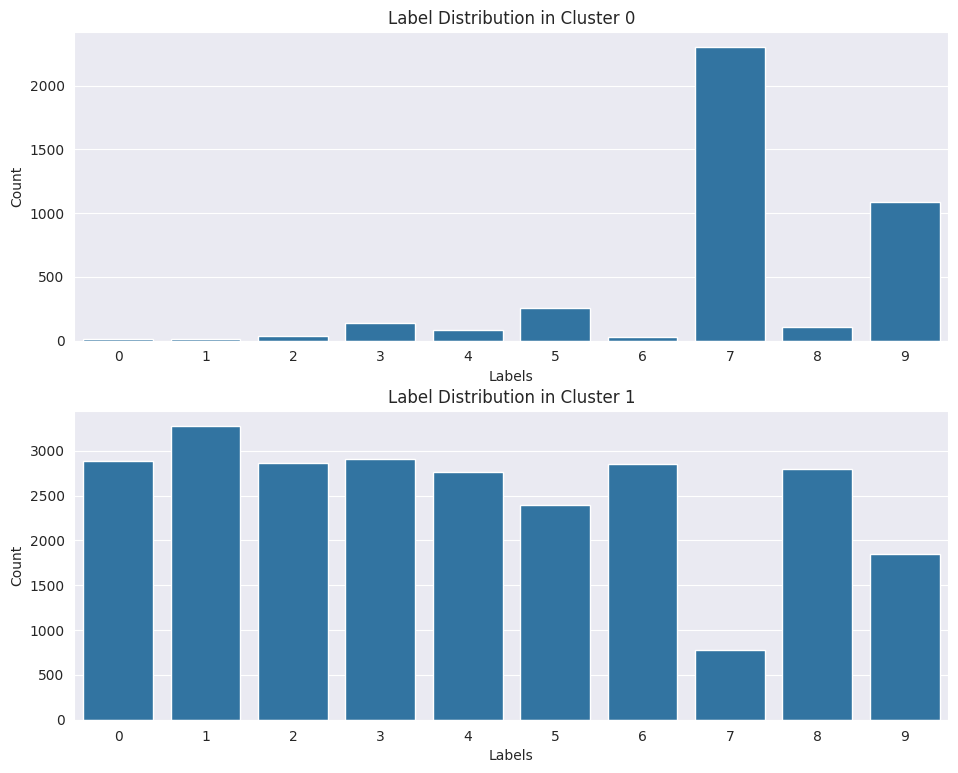

In [9]:
# Reshape the data to a 2D array
X_a_reshaped = X_a.reshape((X_a.shape[0], -1))
n_clusters = 2

# Create a Gaussian Mixture Model
gmm = GaussianMixture(n_components=n_clusters, random_state=42)

# Fit the GMM to the training data
gmm.fit(X_a_reshaped)
# Predict the cluster labels for each data point in the training set
clu_labels = gmm.predict(X_a_reshaped)

fig, axes = plt.subplots(n_clusters, 1, figsize=(10,8))
fig.tight_layout(pad=3.0)

for idx in range(n_clusters):
    # Get the indices of data points belonging to the current cluster
    indices = np.where(clu_labels == idx)[0]
    sampled_indices = np.random.choice(indices, size=int(len(indices) * 0.7), replace=False)
    sample_labels=y_a[sampled_indices]
    
    # Plotting the label distribution for the current cluster
    sns.countplot(x=sample_labels, ax=axes[idx])
    axes[idx].set_title(f'Label Distribution in Cluster {idx}')
    axes[idx].set_xlabel('Labels')
    axes[idx].set_ylabel('Count')
    
plt.show()

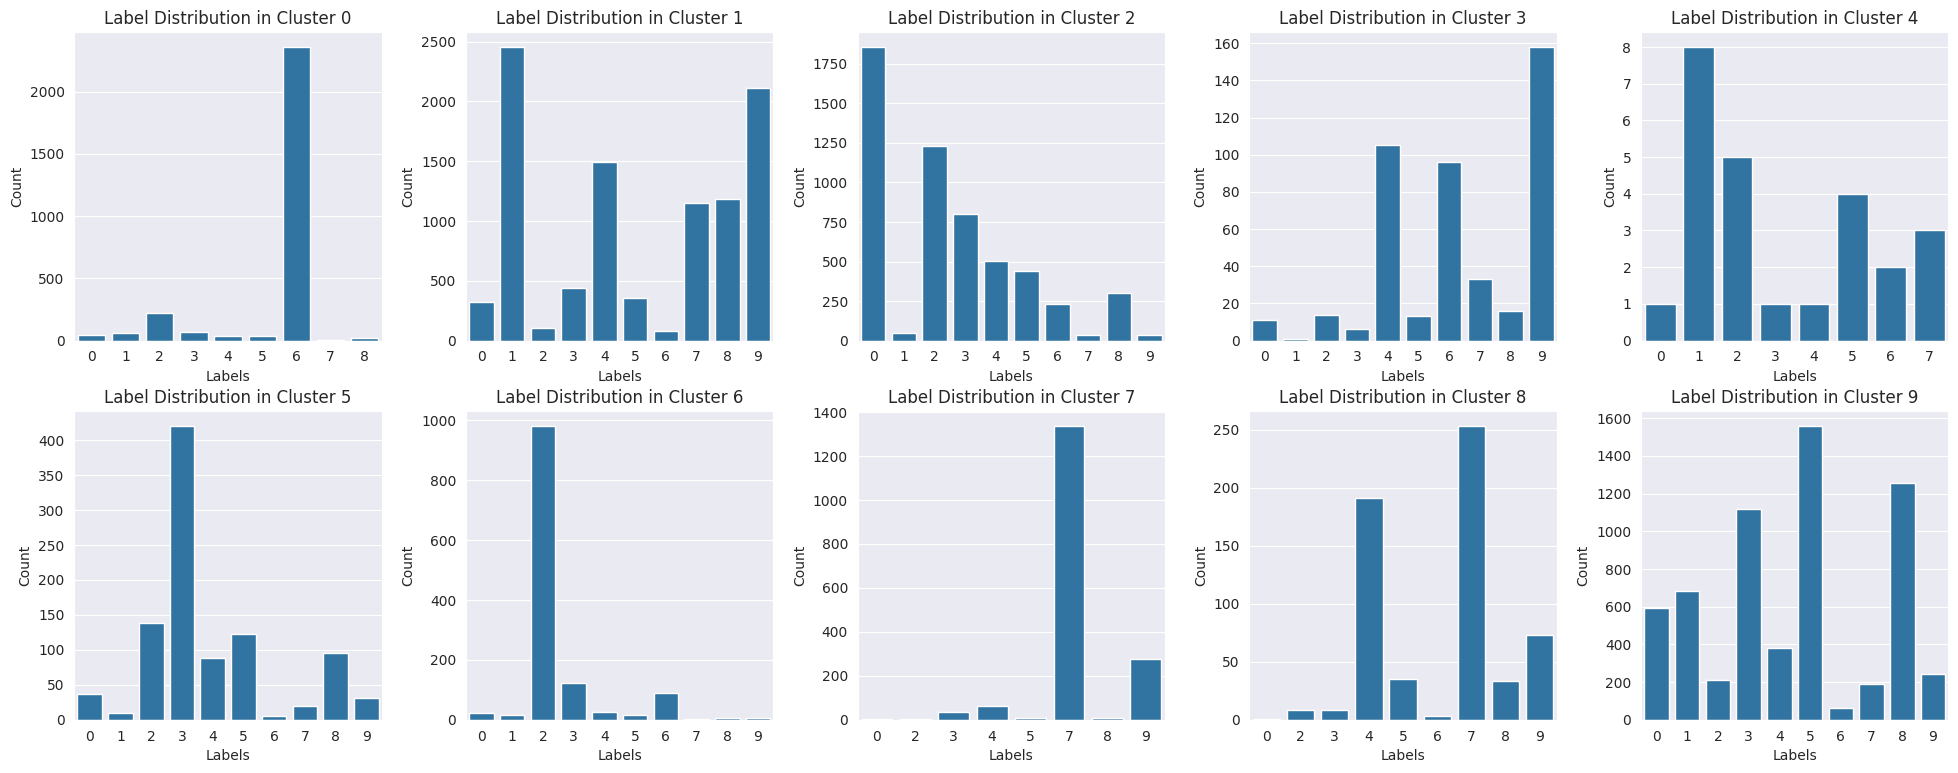

In [10]:
# Reshape the data to a 2D array
X_a_reshaped = X_a.reshape((X_a.shape[0], -1))
n_clusters = 10

# Create a Gaussian Mixture Model
gmm = GaussianMixture(n_components=n_clusters, random_state=42)

# Fit the GMM to the training data
gmm.fit(X_a_reshaped)
# Predict the cluster labels for each data point in the training set
clu_labels = gmm.predict(X_a_reshaped)

num_rows = 2
num_cols = 5
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20,8))
fig.tight_layout(pad=3.0)

for idx in range(n_clusters):
    # Get the indices of data points belonging to the current cluster
    indices = np.where(clu_labels == idx)[0]
    sampled_indices = np.random.choice(indices, size=int(len(indices) * 0.7), replace=False)
    sample_labels=y_a[sampled_indices]
    
    row = idx // num_cols
    col = idx % num_cols
    
    # Plotting the label distribution for the current cluster
    sns.countplot(x=sample_labels, ax=axes[row, col])
    axes[row, col].set_title(f'Label Distribution in Cluster {idx}')
    axes[row, col].set_xlabel('Labels')
    axes[row, col].set_ylabel('Count')
    
plt.show()